# Breast Cancer Wisconsin Dataset
It is quite common to find ML-based applications embedded with real-time patient data available from different healthcare systems in multiple countries, thereby increasing the efficacy of new treatment options which were unavailable before. This data set is all about predicting whether the cancer cells are benign or malignant.

### Content
Information about attributes:

There are total 10 attributes(int)-

Sample code number: id number
Clump Thickness: 1 - 10

Uniformity of Cell Size: 1 - 10

Uniformity of Cell Shape: 1 - 10

Marginal Adhesion: 1 - 10

Single Epithelial Cell Size: 1 - 10

Bare Nuclei: 1 - 10

Bland Chromatin: 1 - 10

Normal Nucleoli: 1 - 10

Mitoses: 1 - 10

Predicted class:
2 for benign and 4 for malignant

Acknowledgements

This data set (Original Wisconsin Breast Cancer Database) is taken from UCI Machine Learning Repository, and can be found at the following link:
https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original

### Additional Information

Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed from the data itself:

Group 1: 367 instances (January 1989)

Group 2:  70 instances (October 1989)

Group 3:  31 instances (February 1990)

Group 4:  17 instances (April 1990)

Group 5:  48 instances (August 1990)

Group 6:  49 instances (Updated January 1991)

Group 7:  31 instances (June 1991)

Group 8:  86 instances (November 1991)

-----------------------------------------
Total:   699 points (as of the donated datbase on 15 July 1992)

Note that the results summarized above in Past Usage refer to a dataset of size 369, while Group 1 has only 367 instances.  This is because it originally contained 369 instances; 2 were removed.  


--------------------------------------------

Importing our Libraries:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

Now let's import our data from its original repository:

In [ ]:
!pip3 install -U ucimlrepo

# Package to easily import datasets from the UC Irvine Machine Learning Repository into scripts and notebooks.
# Current Version: 0.0.3

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
df = breast_cancer_wisconsin_original.data.original


# variable information
print(breast_cancer_wisconsin_original.variables)

                           name     role         type demographic  \
0            Sample_code_number       ID  Categorical        None   
1               Clump_thickness  Feature      Integer        None   
2       Uniformity_of_cell_size  Feature      Integer        None   
3      Uniformity_of_cell_shape  Feature      Integer        None   
4             Marginal_adhesion  Feature      Integer        None   
5   Single_epithelial_cell_size  Feature      Integer        None   
6                   Bare_nuclei  Feature      Integer        None   
7               Bland_chromatin  Feature      Integer        None   
8               Normal_nucleoli  Feature      Integer        None   
9                       Mitoses  Feature      Integer        None   
10                        Class   Target       Binary        None   

                  description units missing_values  
0                        None  None             no  
1                        None  None             no  
2           

Loading the Data

In [ ]:
df.head()

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample_code_number           699 non-null    int64  
 1   Clump_thickness              699 non-null    int64  
 2   Uniformity_of_cell_size      699 non-null    int64  
 3   Uniformity_of_cell_shape     699 non-null    int64  
 4   Marginal_adhesion            699 non-null    int64  
 5   Single_epithelial_cell_size  699 non-null    int64  
 6   Bare_nuclei                  683 non-null    float64
 7   Bland_chromatin              699 non-null    int64  
 8   Normal_nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [ ]:
df.isnull().sum()

Sample_code_number              0
Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [ ]:
16/699

0.022889842632331903

In [ ]:
df.Bare_nuclei.value_counts()

1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: Bare_nuclei, dtype: int64

We can see that those records with the missing values are barely affecting our dataset, and since we can not speculate those values; we are gonna have to drop those records from the data.

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

Sample_code_number             0
Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample_code_number           683 non-null    int64  
 1   Clump_thickness              683 non-null    int64  
 2   Uniformity_of_cell_size      683 non-null    int64  
 3   Uniformity_of_cell_shape     683 non-null    int64  
 4   Marginal_adhesion            683 non-null    int64  
 5   Single_epithelial_cell_size  683 non-null    int64  
 6   Bare_nuclei                  683 non-null    float64
 7   Bland_chromatin              683 non-null    int64  
 8   Normal_nucleoli              683 non-null    int64  
 9   Mitoses                      683 non-null    int64  
 10  Class                        683 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 64.0 KB


Ok, now we're good to go.

Separating the features and target:

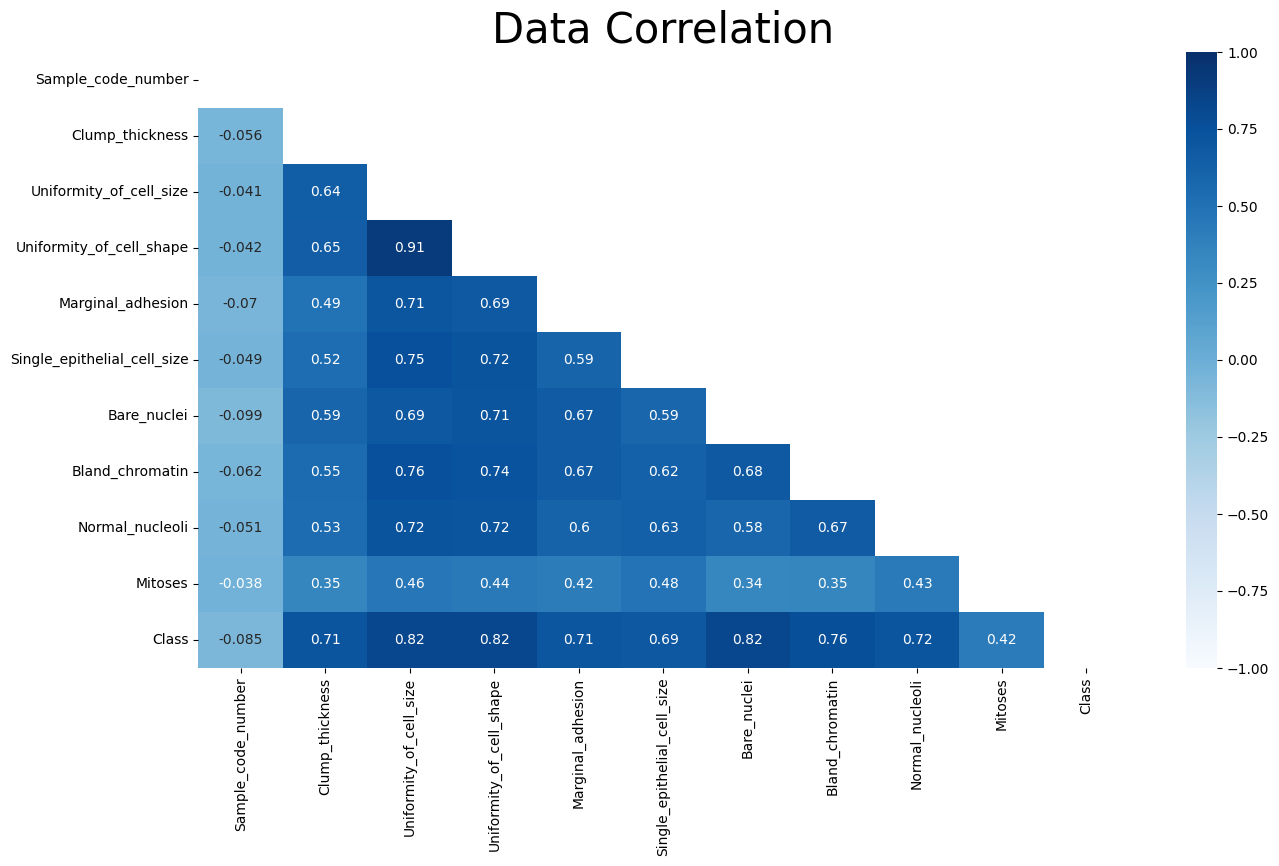

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
mask=np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), mask = mask, annot = True, cmap = "Blues", vmin = -1, vmax = 1)
plt.title('Data Correlation', color = 'black', fontsize = 30)
plt.show()

We noticed that Sample_code_number is merely affecting our target or the data in general and that makes perfect sense. So let's remove it:

In [ ]:
df.drop("Sample_code_number", axis = 1, inplace = True)

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1] # The last column has the label value

Splitting for Train and Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

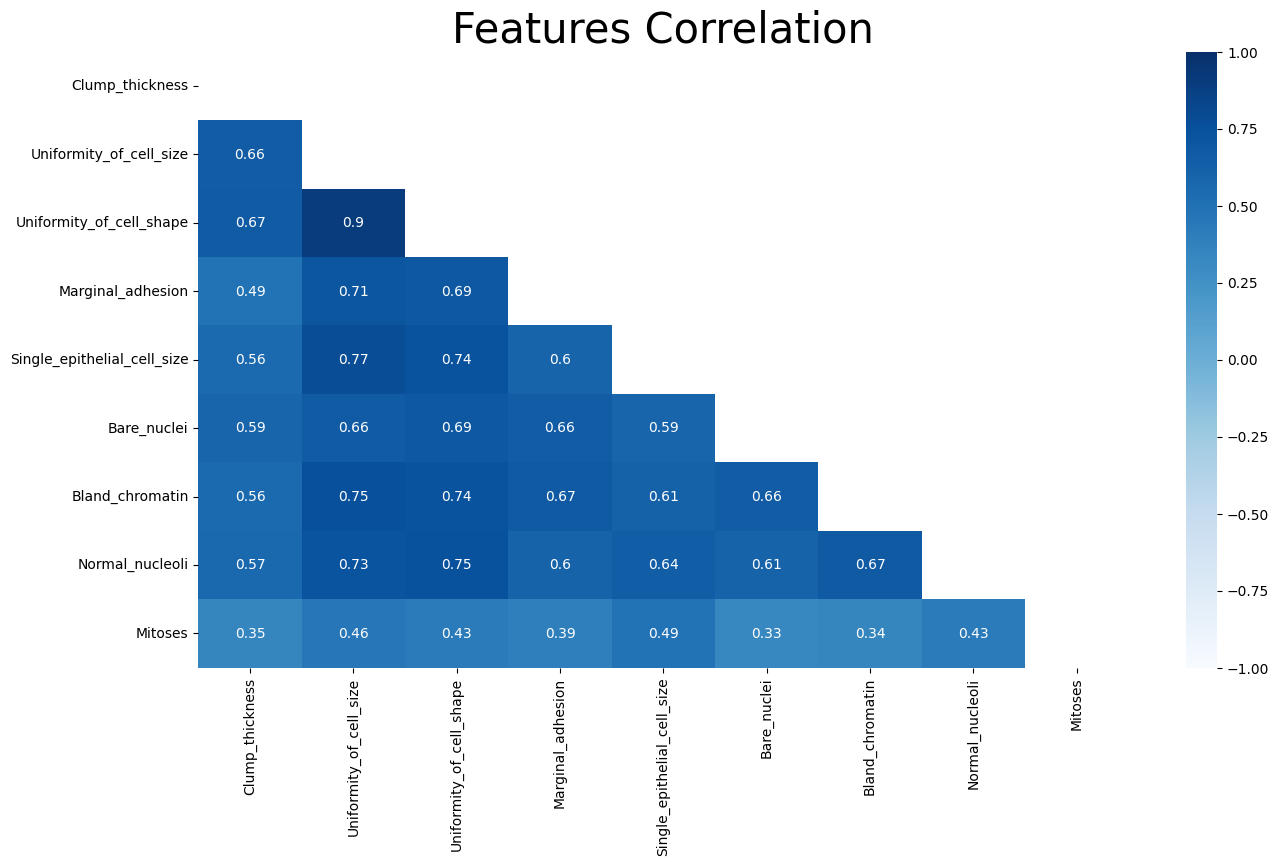

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
mask=np.triu(np.ones_like(X_train.corr()))
sns.heatmap(X_train.corr(), mask = mask, annot = True, cmap = "Blues", vmin = -1, vmax = 1)
plt.title('Features Correlation', color = 'black', fontsize = 30)
plt.show()

We noticed some major correlated features, let's remove them:

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_ft = list(correlation(X_train, 0.7))

In [ ]:
corr_ft

['Single_epithelial_cell_size',
 'Uniformity_of_cell_shape',
 'Marginal_adhesion',
 'Bland_chromatin',
 'Normal_nucleoli']

In [ ]:
X_train.drop(corr_ft,axis=1, inplace = True)
X_test.drop(corr_ft,axis=1, inplace = True)

Feature Scaling

In [ ]:
feature_scaling = StandardScaler()
X_train = feature_scaling.fit_transform(X_train)
X_test = feature_scaling.transform(X_test)

Modeling

1. **Random Forrest**

In [ ]:
rand_for = RandomForestClassifier(n_estimators = 10, max_depth = 5 ,criterion = 'entropy', random_state = 0)
rand_for.fit(X_train, y_train)
print("Random Forrest Train Accuracy: ", rand_for.score(X_train,y_train), "\n")
print("Random Forrest Test Accuracy: ", rand_for.score(X_test,y_test))

Random Forrest Train Accuracy:  0.9835164835164835 

Random Forrest Test Accuracy:  0.9708029197080292


In [ ]:
y_pred = rand_for.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.98      0.98      0.98        87
           4       0.96      0.96      0.96        50

    accuracy                           0.97       137
   macro avg       0.97      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137



[[85  2]
 [ 2 48]]


Text(0.5, 1.0, 'Random Forrest Confusion Matrix')

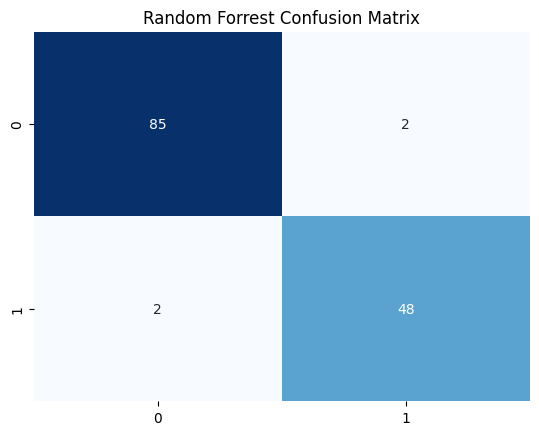

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Random Forrest Confusion Matrix')

2. **Logistic Regression**

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
print("Logistic Regression Train Accuracy: ", lr.score(X_train,y_train), "\n")
print("Logistic Regression Test Accuracy: ", lr.score(X_test,y_test))

Logistic Regression Train Accuracy:  0.9615384615384616 

Logistic Regression Test Accuracy:  0.9708029197080292


We can notice some minor overfitting here.

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print("Logistic Regression Classification Report:", "\n", classification_report(y_test, lr.predict(X_test)))

Logistic Regression Classification Report: 
               precision    recall  f1-score   support

           2       0.97      0.99      0.98        87
           4       0.98      0.94      0.96        50

    accuracy                           0.97       137
   macro avg       0.97      0.96      0.97       137
weighted avg       0.97      0.97      0.97       137



[[86  1]
 [ 3 47]]


Text(0.5, 1.0, 'Logistic Regresstion Confusion Matrix')

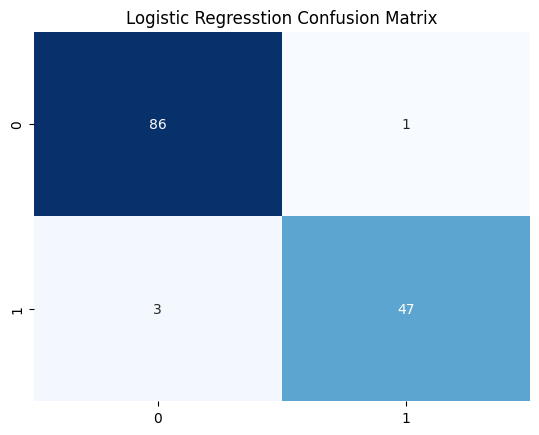

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, lr.predict(X_test))
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Logistic Regresstion Confusion Matrix')

3. **Decision Tree Classifier**

In [ ]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
print("Decision Tree Train Accuracy: ", dt.score(X_train,y_train), "\n")
print("Decision Tree Test Accuracy: ", dt.score(X_test,y_test))

Decision Tree Train Accuracy:  0.9963369963369964 

Decision Tree Test Accuracy:  0.9635036496350365


In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
print("Decision Tree Classification Report:", "\n",classification_report(y_test, dt.predict(X_test)))

Decision Tree Classification Report: 
               precision    recall  f1-score   support

           2       0.97      0.98      0.97        87
           4       0.96      0.94      0.95        50

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137



[[85  2]
 [ 3 47]]


Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

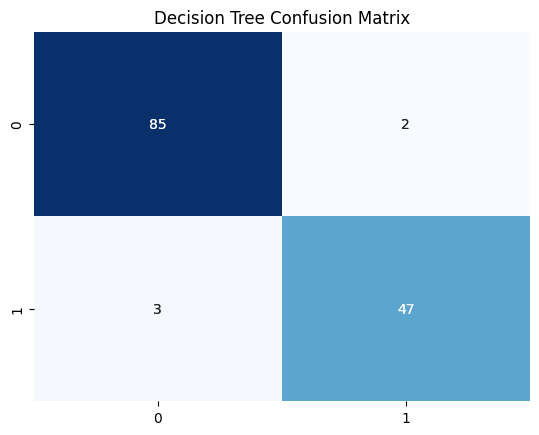

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, dt.predict(X_test))
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Logistic Regresstion Confusion Matrix')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Decision Tree Confusion Matrix')

4. **Naive Bayes**

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train , y_train)
print("Naive Bayes Train Accuracy: ", gnb.score(X_train,y_train), "\n")
print("Naive Bayes Test Accuracy: ", gnb.score(X_test,y_test))

Naive Bayes Train Accuracy:  0.9597069597069597 

Naive Bayes Test Accuracy:  0.9635036496350365


In [ ]:
y_pred = gnb.predict(X_test)

In [ ]:
print("Naive Bayes Classification Report:", "\n",classification_report(y_test, gnb.predict(X_test)))

Naive Bayes Classification Report: 
               precision    recall  f1-score   support

           2       0.98      0.97      0.97        87
           4       0.94      0.96      0.95        50

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137



[[84  3]
 [ 2 48]]


Text(0.5, 1.0, 'Naive Bayes Confusion Matrix')

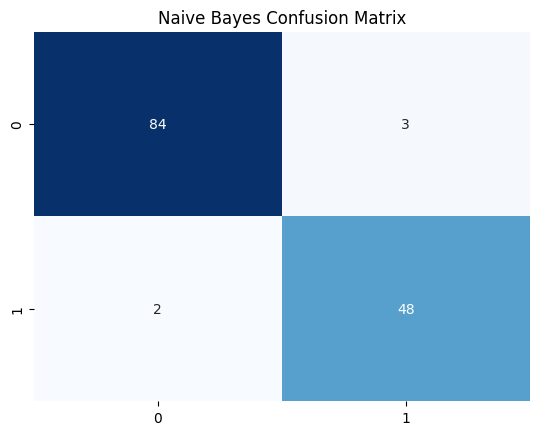

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, gnb.predict(X_test))
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Naive Bayes Confusion Matrix')

5. **Support Vector Machine**

In [ ]:
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(X_train, y_train)
print("Support Vector Machine Train Accuracy: ", svm.score(X_train,y_train), "\n")
print("Support Vector Machine Test Accuracy: ", svm.score(X_test,y_test))

Support Vector Machine Train Accuracy:  0.9652014652014652 

Support Vector Machine Test Accuracy:  0.9635036496350365


In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
print("Support Vector Machine Classification Report:", "\n",classification_report(y_test, svm.predict(X_test)))

Support Vector Machine Classification Report: 
               precision    recall  f1-score   support

           2       0.97      0.98      0.97        87
           4       0.96      0.94      0.95        50

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137



[[85  2]
 [ 3 47]]


Text(0.5, 1.0, 'Support Vector Machine Confusion Matrix')

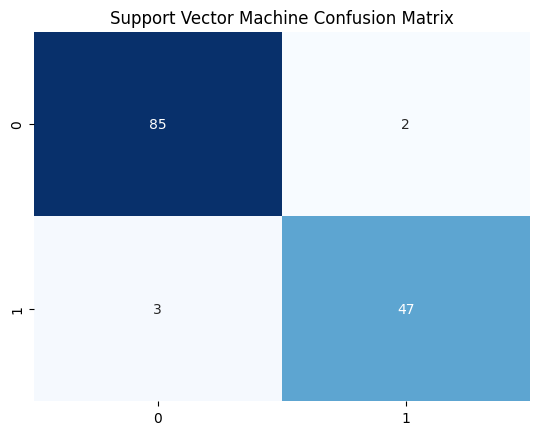

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, svm.predict(X_test))
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Support Vector Machine Confusion Matrix')

5. **k-Nearest Neighbors (KNN)**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("k-Nearest Neighbors Train Accuracy: ", knn.score(X_train,y_train), "\n")
print("k-Nearest Neighbors Test Accuracy: ", knn.score(X_test,y_test))

k-Nearest Neighbors Train Accuracy:  0.9725274725274725 

k-Nearest Neighbors Test Accuracy:  0.9854014598540146


We can also notice a minor overfitting here as well

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print("k-Nearest Neighbors Classification Report:", "\n",classification_report(y_test, knn.predict(X_test)))

k-Nearest Neighbors Classification Report: 
               precision    recall  f1-score   support

           2       0.99      0.99      0.99        87
           4       0.98      0.98      0.98        50

    accuracy                           0.99       137
   macro avg       0.98      0.98      0.98       137
weighted avg       0.99      0.99      0.99       137



[[86  1]
 [ 1 49]]


Text(0.5, 1.0, 'k-Nearest Neighbors Confusion Matrix')

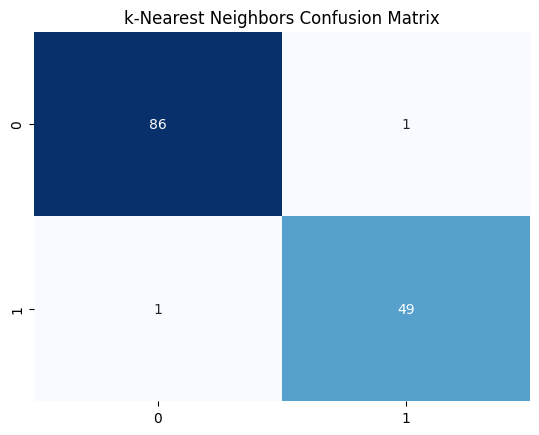

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, knn.predict(X_test))
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('k-Nearest Neighbors Confusion Matrix')

### We can see that we got the best results from both Random Forrest and Support Vector Machine algorithms with about 97% accuracy, and also very high **recall** and **precision** scores.